In [2]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np
pd.options.display.float_format = '{:,.0f}'.format

In [3]:
# How is the Dominican poplulation determined in the census
# What are the top 5 states with the hightest dominican population
# What is the state with the fastest growing dominican population
# which state has the highest percentage of dominican population relative to the entire state population
# What is the projected dominican population in New york
# which borouhgs in New York are experiencing the highest growth in dominicna population? New Jersery? Florida? Pennsilvania? Rhode Island?


In [4]:
# Build base url
HOST = 'https://api.census.gov/data'
dataset = 'acs/acs1'

# Specify Census variables and other predicates
get_vars = ['NAME', 'B01003_001E', 'B03001_001E', 'B03001_007E']
predicates = {}
predicates['get'] = ",".join(get_vars)
predicates['for'] = "state:*"
col_names = ['name', 'total_pop', 'total_hisc_pop', 'total_dominican_pop', 'state']


In [5]:
# Loop over years 2005 to 2020
dfs = []
for year in range(2005, 2020):
    base_url = '/'.join([HOST, str(year), dataset])
    r = requests.get(base_url, params=predicates)
    df = pd.DataFrame(columns=col_names, data=r.json()[1:])
    df['year'] = year
    dfs.append(df)

In [6]:
df = pd.concat(dfs)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 780 entries, 0 to 51
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   name                 780 non-null    object
 1   total_pop            780 non-null    object
 2   total_hisc_pop       636 non-null    object
 3   total_dominican_pop  636 non-null    object
 4   state                780 non-null    object
 5   year                 780 non-null    int64 
dtypes: int64(1), object(5)
memory usage: 42.7+ KB


In [12]:
# Convert each column with numeric data to an appropriate type
df['total_pop'] = df.total_pop.astype(float)
df['total_hisc_pop'] = df.total_hisc_pop.astype(float)
df['total_dominican_pop'] = df.total_dominican_pop.astype(float)

In [13]:
# Convert df to time series
df.set_index('year', inplace=True)

In [14]:
df.index = pd.to_datetime(df.index, format = '%Y')

In [22]:
df.to_csv(r'C:\Users\edwar\data-science\dominicans_us_census\dominicans_usa.csv', header=True)

In [24]:
df.to_excel(r'C:\Users\edwar\data-science\dominicans_us_census\dominicans_usa.xlsx', header=True)

In [10]:
df.head()

,name,total_pop,total_hisc_pop,total_dominican_pop,state
year,,,,,
2005-01-01,Alabama,"4,442,558","4,442,558",178,01
2005-01-01,Alaska,"641,724",nan,nan,02
2005-01-01,Arizona,"5,829,839","5,829,839","1,989",04
2005-01-01,Arkansas,"2,701,431",nan,nan,05
2005-01-01,California,"35,278,768","35,278,768","12,086",06


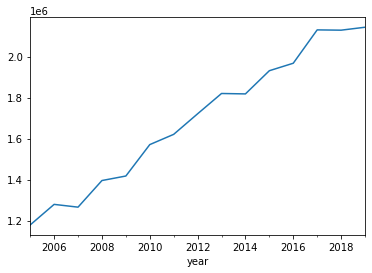

In [11]:
# Total dominican pop in the USA from 2005 to 2019
df.total_dominican_pop.groupby('year').sum().plot()

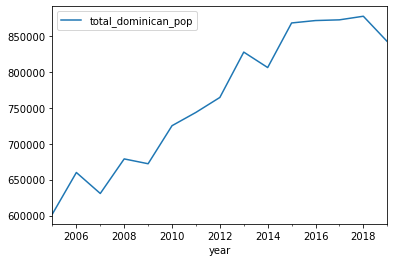

In [12]:
# Total dominican pop in New York from 2005 to 2019
df[df.name == 'New York'].plot(y ='total_dominican_pop')

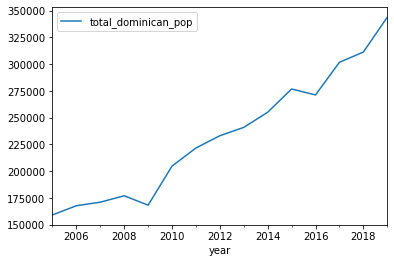

In [151]:
df[df.name == 'New Jersey'].plot(y ='total_dominican_pop')

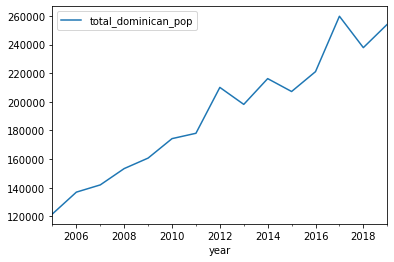

In [152]:
df[df.name == 'Florida'].plot(y ='total_dominican_pop')

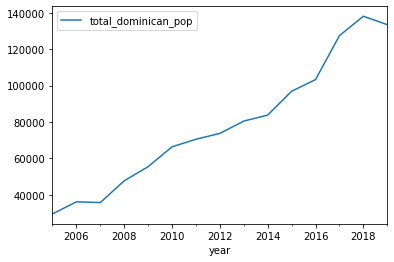

In [153]:
df[df.name == 'Pennsylvania'].plot(y ='total_dominican_pop')

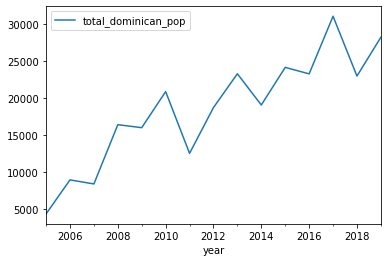

In [154]:
df[df.name == 'Georgia'].plot(y ='total_dominican_pop')

In [13]:
df_pivot = df.pivot_table(values='total_dominican_pop', index='name', columns='year' )

In [27]:
# fig, ax = plt.subplots(figsize=(16,3))
# # df[df.name == 'Arizona'].plot(y='total_dominican_pop')
# ax.

In [28]:
df_pivot

year,2005-01-01,2006-01-01,2007-01-01,2008-01-01,2009-01-01,2010-01-01,2011-01-01,2012-01-01,2013-01-01,2014-01-01,2015-01-01,2016-01-01,2017-01-01,2018-01-01,2019-01-01
name,,,,,,,,,,,,,,,
Alabama,178,137,354,943,616,600,"1,100",963,238,"1,198","1,902",837,"1,327","1,356","2,959"
Alaska,nan,nan,nan,nan,"3,351",nan,nan,"1,990",701,"2,360",nan,nan,nan,nan,nan
Arizona,"1,989","2,110","1,584","2,783","3,980","2,693","2,757","1,968","3,224","3,341","6,247","5,345","5,936","4,583","6,267"
Arkansas,nan,706,nan,nan,537,153,325,nan,182,366,"1,744",329,153,0,563
California,"12,086","5,915","12,863","8,369","10,327","11,079","14,286","18,626","16,458","15,157","16,098","14,778","18,381","19,305","16,422"
Colorado,511,"1,648",892,"2,521",737,"1,869","2,600","2,639","2,275","1,638","3,068","2,634","4,870","3,371","4,920"
Connecticut,"14,809","17,213","17,888","21,842","27,686","28,242","23,466","34,754","36,699","30,408","38,047","41,917","40,343","50,399","46,228"
Delaware,726,nan,nan,nan,nan,"1,452","1,626","2,661","1,906","2,274","4,443","3,760","3,672","4,386","2,163"
District of Columbia,"2,689","2,482","4,767","2,649","1,161","2,649","2,529","3,681","3,942","1,948","2,354","4,112","3,744","5,894","9,251"


In [116]:
top_10_2019 = list(df_pivot['2019-01-01'].sort_values(ascending=False).head(10).index)

In [150]:
top_10_2019

['New York',
 'New Jersey',
 'Florida',
 'Massachusetts',
 'Pennsylvania',
 'Rhode Island',
 'Puerto Rico',
 'Connecticut',
 'North Carolina',
 'Georgia']

In [139]:
top_20_2019 = list(df_pivot['2019-01-01'].sort_values(ascending=False).head(20).index)

In [138]:
df_pivot.loc[df_pivot.index.isin(top_10_2019), '2016':'2019'].diff(axis=1).stack().index

MultiIndex([(   'Connecticut', '2017-01-01'),
            (   'Connecticut', '2018-01-01'),
            (   'Connecticut', '2019-01-01'),
            (       'Florida', '2017-01-01'),
            (       'Florida', '2018-01-01'),
            (       'Florida', '2019-01-01'),
            (       'Georgia', '2017-01-01'),
            (       'Georgia', '2018-01-01'),
            (       'Georgia', '2019-01-01'),
            ( 'Massachusetts', '2017-01-01'),
            ( 'Massachusetts', '2018-01-01'),
            ( 'Massachusetts', '2019-01-01'),
            (    'New Jersey', '2017-01-01'),
            (    'New Jersey', '2018-01-01'),
            (    'New Jersey', '2019-01-01'),
            (      'New York', '2017-01-01'),
            (      'New York', '2018-01-01'),
            (      'New York', '2019-01-01'),
            ('North Carolina', '2017-01-01'),
            ('North Carolina', '2018-01-01'),
            ('North Carolina', '2019-01-01'),
            (  'Pennsylvania', '20

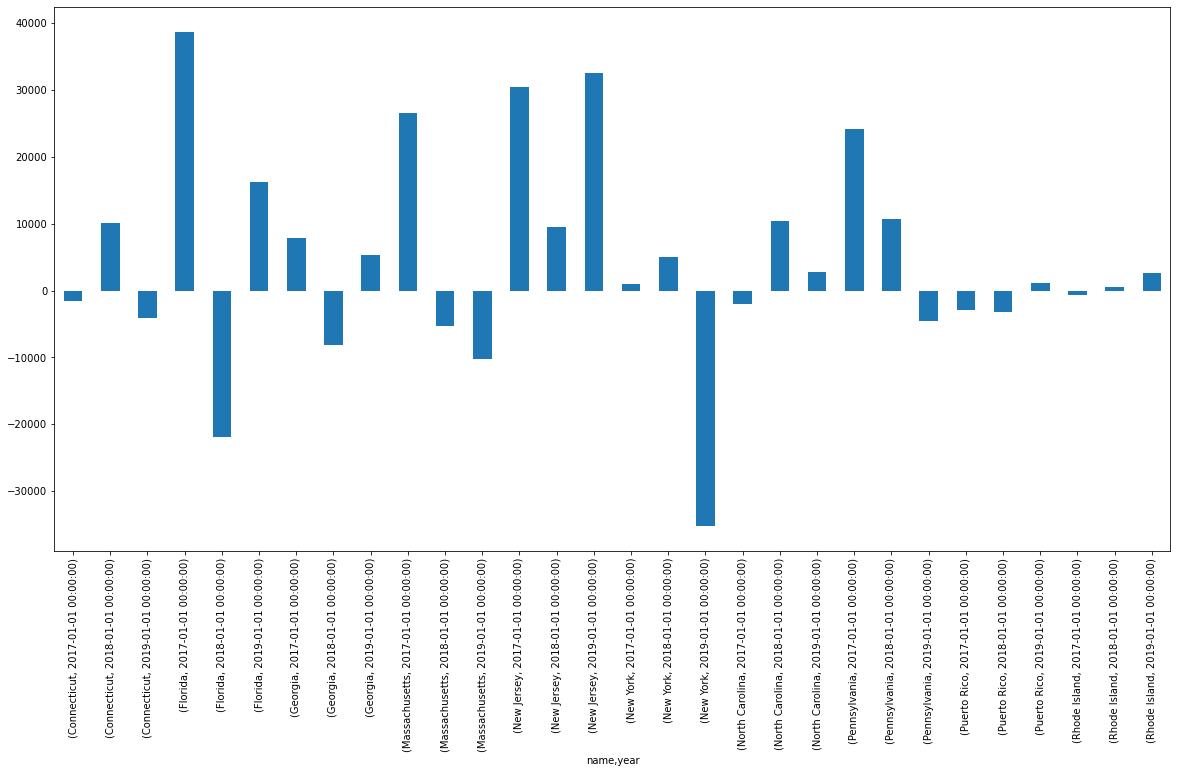

In [149]:
plt.figure(figsize=(20,10))
df_pivot.loc[df_pivot.index.isin(top_10_2019), '2016':'2019'].diff(axis=1).stack().plot(kind='bar')
plt.show()

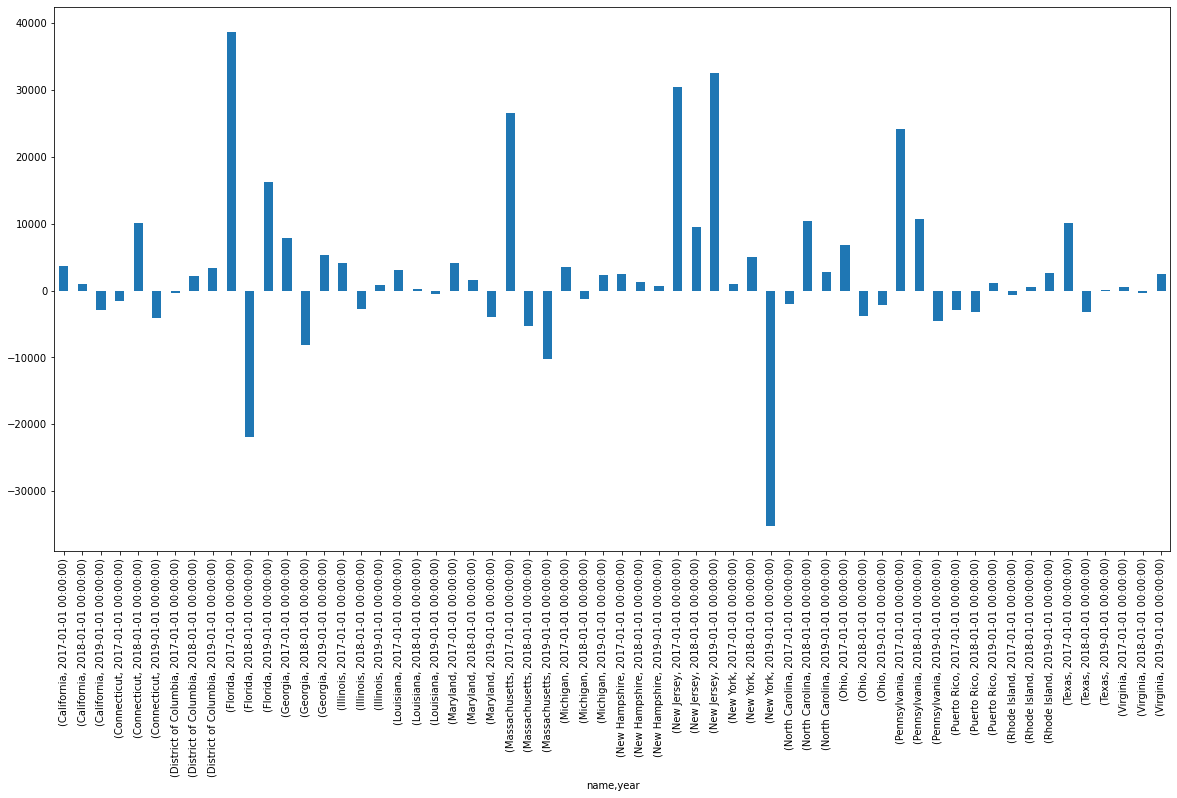

In [147]:
plt.figure(figsize=(20,10))
df_pivot.loc[df_pivot.index.isin(top_20_2019), '2016':'2019'].diff(axis=1).stack().plot(kind='bar')
plt.show()

In [103]:
df_pivot_2017_2019_diff = df_pivot.diff(axis=1).loc[:,'2017':'2019']
df_pivot_2017_2019_diff.stack()

name        year      
Alabama     2017-01-01      490
            2018-01-01       29
            2019-01-01    1,603
Arizona     2017-01-01      591
            2018-01-01   -1,353
                          ...  
Washington  2018-01-01   -2,689
            2019-01-01     -276
Wisconsin   2017-01-01      282
            2018-01-01    1,340
            2019-01-01      501
Length: 129, dtype: float64

In [29]:
df_pivot_diff = df_pivot.diff(axis=1)

In [49]:
top_20_states_2019 = list(df_2019.sort_values('total_dominican_pop', ascending=False).head(20)['name'])

In [57]:
top_20_states_2019

[]

In [52]:
df_2019 = df[df.index == 2019][['name', 'total_dominican_pop']].dropna()
df_2019 = df_2019.sort_values('total_dominican_pop', ascending=False)

In [53]:
df_top_20_15_to_19 = df[df['name'].isin(top_20_states_2019)]['2015':'2019']

In [54]:
df_top_20_15_to_19_pivot = df_top_20_15_to_19.pivot_table(values='total_dominican_pop', index='name', columns='year')

In [55]:
df_top_20_15_to_19_pivot_diff = df_top_20_15_to_19_pivot.diff(axis=1)

In [56]:
df_top_20_15_to_19_pivot_diff

name


In [38]:
pd.melt(df_top_20_15_to_19_pivot_diff, id_vars=['year'], value_vars= )

SyntaxError: invalid syntax (<ipython-input-38-a4a9dd5cf3dd>, line 1)

In [39]:
flattend.columns

NameError: name 'flattend' is not defined

In [40]:
top_20_states_2019

[]

[]

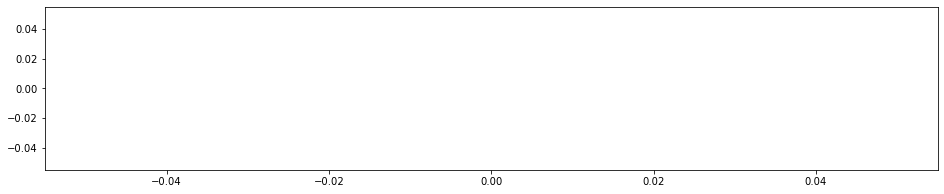

In [41]:


# df[df.name == 'New York'].plot(y='total_dominican_pop')
fig, ax = plt.subplots(figsize=(16,3))

ax.plot(data=df)

In [44]:
top_20_states_2019

[]